# 环境准备

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,mean_absolute_error

# 读入数据

In [3]:
df_power = pd.read_csv("./power_data.csv")
df_power['ds']= pd.to_datetime(df_power['ds'])
df_power

,ds,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST
0,2004-01-01 01:00:00,7225.09,877.79,1044.89,745.79,7124.21,1660.45,3639.12,654.61
1,2004-01-01 02:00:00,6994.25,850.75,1032.04,721.34,6854.58,1603.52,3495.16,639.88
2,2004-01-01 03:00:00,6717.42,831.63,1021.10,699.70,6639.48,1527.99,3322.70,623.42
3,2004-01-01 04:00:00,6554.27,823.56,1015.41,691.84,6492.39,1473.89,3201.72,613.49
4,2004-01-01 05:00:00,6511.19,823.38,1009.74,686.76,6452.26,1462.76,3163.74,613.32
...,...,...,...,...,...,...,...,...,...
154867,2021-08-31 20:00:00,14477.26,1594.07,4307.99,832.71,13920.14,3666.45,7113.79,1150.02
154868,2021-08-31 21:00:00,14044.85,1565.64,4252.85,799.24,13308.33,3503.66,6805.93,1112.36
154869,2021-08-31 22:00:00,13796.10,1519.51,4213.14,777.39,12938.13,3396.58,6611.26,1086.27
154870,2021-08-31 23:00:00,13746.95,1498.90,4188.78,768.89,12876.06,3340.30,6589.14,1075.76


In [4]:
df_power.index = df_power.ds
df_power=df_power.asfreq('1H')

In [5]:
df_power

,ds,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST
ds,,,,,,,,,
2004-01-01 01:00:00,2004-01-01 01:00:00,7225.09,877.79,1044.89,745.79,7124.21,1660.45,3639.12,654.61
2004-01-01 02:00:00,2004-01-01 02:00:00,6994.25,850.75,1032.04,721.34,6854.58,1603.52,3495.16,639.88
2004-01-01 03:00:00,2004-01-01 03:00:00,6717.42,831.63,1021.10,699.70,6639.48,1527.99,3322.70,623.42
2004-01-01 04:00:00,2004-01-01 04:00:00,6554.27,823.56,1015.41,691.84,6492.39,1473.89,3201.72,613.49
2004-01-01 05:00:00,2004-01-01 05:00:00,6511.19,823.38,1009.74,686.76,6452.26,1462.76,3163.74,613.32
...,...,...,...,...,...,...,...,...,...
2021-08-31 20:00:00,2021-08-31 20:00:00,14477.26,1594.07,4307.99,832.71,13920.14,3666.45,7113.79,1150.02
2021-08-31 21:00:00,2021-08-31 21:00:00,14044.85,1565.64,4252.85,799.24,13308.33,3503.66,6805.93,1112.36
2021-08-31 22:00:00,2021-08-31 22:00:00,13796.10,1519.51,4213.14,777.39,12938.13,3396.58,6611.26,1086.27


In [6]:
df_power.isna().sum()

ds           0
COAST       18
EAST        18
FAR_WEST    18
NORTH       18
NORTH_C     18
SOUTHERN    18
SOUTH_C     18
WEST        18
dtype: int64

In [7]:
#填补缺值
df_power.fillna(method='pad',inplace=True)

In [8]:
df_power.isna().sum()

ds          0
COAST       0
EAST        0
FAR_WEST    0
NORTH       0
NORTH_C     0
SOUTHERN    0
SOUTH_C     0
WEST        0
dtype: int64

In [9]:
df_power.columns

Index(['ds', 'COAST', 'EAST', 'FAR_WEST', 'NORTH', 'NORTH_C', 'SOUTHERN',
       'SOUTH_C', 'WEST'],
      dtype='object')

# 数据归一化

In [10]:
scaler_list = [MinMaxScaler() for i in range(8)]
df_power_norm = df_power.copy()
df_power_norm["COAST"]=scaler_list[0].fit_transform(df_power["COAST"].values.reshape(-1,1))
df_power_norm['EAST']=scaler_list[1].fit_transform(df_power['EAST'].values.reshape(-1,1))
df_power_norm['FAR_WEST']=scaler_list[2].fit_transform(df_power['FAR_WEST'].values.reshape(-1,1))

df_power_norm['NORTH']=scaler_list[3].fit_transform(df_power['NORTH'].values.reshape(-1,1))
df_power_norm['NORTH_C']=scaler_list[4].fit_transform(df_power['NORTH_C'].values.reshape(-1,1))
df_power_norm['SOUTHERN']=scaler_list[5].fit_transform(df_power['SOUTHERN'].values.reshape(-1,1))
df_power_norm['SOUTH_C']=scaler_list[6].fit_transform(df_power['SOUTH_C'].values.reshape(-1,1))
df_power_norm[ 'WEST']=scaler_list[7].fit_transform(df_power[ 'WEST'].values.reshape(-1,1))


In [11]:
df_power_norm

,ds,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST
ds,,,,,,,,,
2004-01-01 01:00:00,2004-01-01 01:00:00,0.282421,0.063278,0.047459,0.141693,0.054295,0.063840,0.058316,0.057693
2004-01-01 02:00:00,2004-01-01 02:00:00,0.270615,0.051050,0.044402,0.128240,0.041134,0.052080,0.045439,0.048204
2004-01-01 03:00:00,2004-01-01 03:00:00,0.256458,0.042404,0.041799,0.116333,0.030635,0.036477,0.030013,0.037601
2004-01-01 04:00:00,2004-01-01 04:00:00,0.248114,0.038755,0.040445,0.112009,0.023455,0.025301,0.019191,0.031204
2004-01-01 05:00:00,2004-01-01 05:00:00,0.245911,0.038673,0.039095,0.109213,0.021497,0.023002,0.015794,0.031095
...,...,...,...,...,...,...,...,...,...
2021-08-31 20:00:00,2021-08-31 20:00:00,0.653314,0.387191,0.823918,0.189518,0.386008,0.478231,0.369123,0.376829
2021-08-31 21:00:00,2021-08-31 21:00:00,0.631199,0.374334,0.810798,0.171102,0.356145,0.444603,0.341585,0.352569
2021-08-31 22:00:00,2021-08-31 22:00:00,0.618478,0.353473,0.801349,0.159080,0.338075,0.422482,0.324172,0.335762


# 使用Prophet分别对八大地区进行建模

## COAST地区

In [12]:
df_power_1 = df_power_norm.rename(columns={'COAST':'y'})

In [13]:
df_power_1.head(1)

,ds,y,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST
ds,,,,,,,,,
2004-01-01 01:00:00,2004-01-01 01:00:00,0.282421,0.063278,0.047459,0.141693,0.054295,0.06384,0.058316,0.057693


In [14]:
# df_power_1 = df_power_1.iloc[-20000:,:]
# df_power_1["cap"]  =df_power_1.y.values.max()

In [32]:
#构建一个具备同时有年、月、周季节性的模型
m = Prophet(yearly_seasonality=True, weekly_seasonality=True,daily_seasonality=True,
            changepoint_prior_scale=0.2,holidays_prior_scale=10,
           seasonality_mode='additive',changepoint_range=0.9)
# m.add_seasonality(name='year', period=365.25, fourier_order=10,prior_scale=5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5,prior_scale=5)#构建月季节性
# m.add_seasonality(name='week', period=7, fourier_order=3,prior_scale=10)
# m.add_seasonality(name='daily', period=1, fourier_order=4,prior_scale=10)

In [33]:
m.add_country_holidays('US')

In [34]:
m.fit(df_power_1)

In [18]:
# # m.train_holiday_names
# 0                                      New Year's Day
# 1                           New Year's Day (Observed)
# 2                          Martin Luther King Jr. Day
# 3                               Washington's Birthday
# 4                                        Memorial Day
# 5                                    Independence Day
# 6                         Independence Day (Observed)
# 7                                           Labor Day
# 8                                        Columbus Day
# 9                                        Veterans Day
# 10                                       Thanksgiving
# 11                                      Christmas Day
# 12                           Christmas Day (Observed)
# 13                            Veterans Day (Observed)
# 14               Juneteenth National Independence Day
# 15    Juneteenth National Independence Day (Observed)

In [35]:
data_1 = m.predict(df_power_1)

In [36]:
data_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-01 01:00:00,0.407043,0.236494,0.472029,0.407043,0.407043,0.0,0.0,0.0,0.0,...,0.012187,0.012187,0.012187,-0.071871,-0.071871,-0.071871,0.0,0.0,0.0,0.356081
1,2004-01-01 02:00:00,0.407044,0.233588,0.466084,0.407044,0.407044,0.0,0.0,0.0,0.0,...,0.012217,0.012217,0.012217,-0.071841,-0.071841,-0.071841,0.0,0.0,0.0,0.356511
2,2004-01-01 03:00:00,0.407045,0.234937,0.464839,0.407045,0.407045,0.0,0.0,0.0,0.0,...,0.012231,0.012231,0.012231,-0.071810,-0.071810,-0.071810,0.0,0.0,0.0,0.354380
3,2004-01-01 04:00:00,0.407046,0.227937,0.469383,0.407046,0.407046,0.0,0.0,0.0,0.0,...,0.012228,0.012228,0.012228,-0.071779,-0.071779,-0.071779,0.0,0.0,0.0,0.350218
4,2004-01-01 05:00:00,0.407047,0.231128,0.460528,0.407047,0.407047,0.0,0.0,0.0,0.0,...,0.012209,0.012209,0.012209,-0.071749,-0.071749,-0.071749,0.0,0.0,0.0,0.344593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154867,2021-08-31 20:00:00,0.575934,0.575388,0.797748,0.575934,0.575934,0.0,0.0,0.0,0.0,...,0.011944,0.011944,0.011944,0.103509,0.103509,0.103509,0.0,0.0,0.0,0.687093
154868,2021-08-31 21:00:00,0.575936,0.580321,0.821032,0.575936,0.575936,0.0,0.0,0.0,0.0,...,0.011776,0.011776,0.011776,0.103324,0.103324,0.103324,0.0,0.0,0.0,0.696509
154869,2021-08-31 22:00:00,0.575938,0.586025,0.813809,0.575938,0.575938,0.0,0.0,0.0,0.0,...,0.011613,0.011613,0.011613,0.103138,0.103138,0.103138,0.0,0.0,0.0,0.705616
154870,2021-08-31 23:00:00,0.575940,0.601821,0.831090,0.575940,0.575940,0.0,0.0,0.0,0.0,...,0.011458,0.011458,0.011458,0.102953,0.102953,0.102953,0.0,0.0,0.0,0.713423


In [22]:
# fig1 = m.plot_components(data_1)

MAPE= 0.1716023813837392
MSE= 0.020177353076609818
MAE= 0.12313995799273689


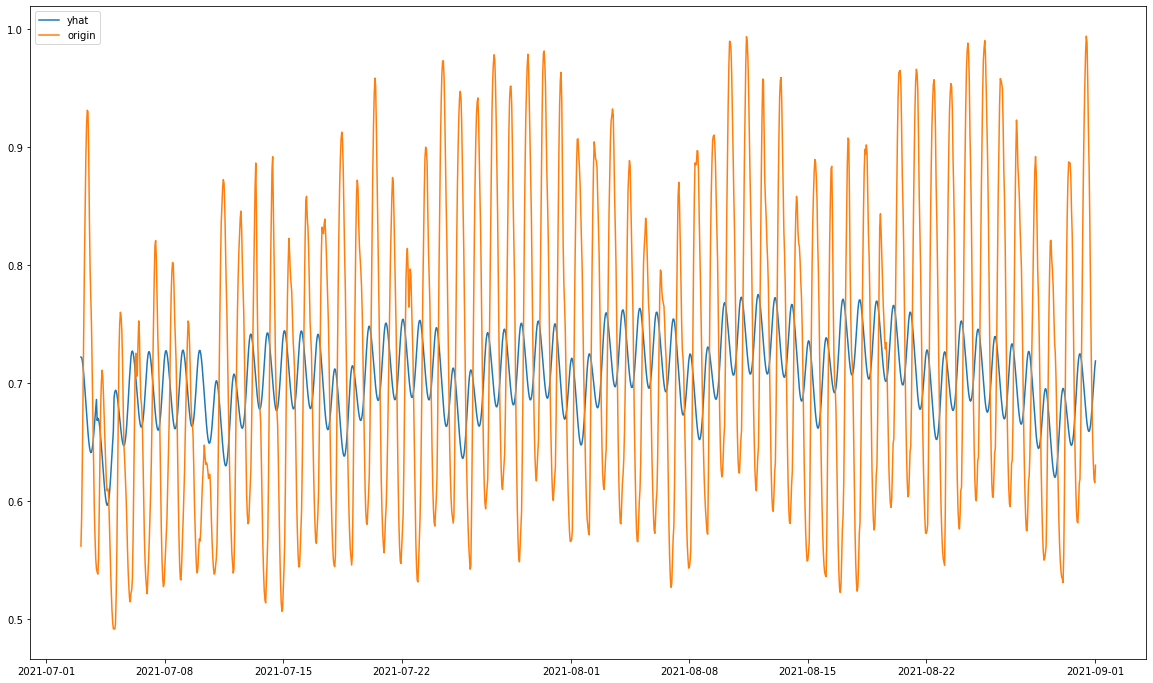

In [37]:
window = 1440
plt.figure(figsize=(20,12))
plt.plot(data_1.iloc[-window:,0],data_1.iloc[-window:,-1],label='yhat')
plt.plot(data_1.iloc[-window:,0],df_power_1.iloc[-window:,1],label='origin')
plt.legend()

MAPE = mean_absolute_percentage_error(np.array(df_power_1.iloc[-window:,1]),np.array(data_1.iloc[-window:,-1]))
MSE = mean_squared_error(np.array(df_power_1.iloc[-window:,1]),np.array(data_1.iloc[-window:,-1]))
MAE = mean_absolute_error(np.array(df_power_1.iloc[-window:,1]),np.array(data_1.iloc[-window:,-1]))
print("MAPE=",MAPE)
print("MSE=",MSE)
print("MAE=",MAE)

#未加入节假日
# MAPE= 0.07839903879021605
# MSE= 0.004804283030881692
# MAE= 0.057565402758915495

#加入节假日
# MAPE= 0.0787489588348986
# MSE= 0.004543082955479281
# MAE= 0.05720904630665397

<AxesSubplot:>

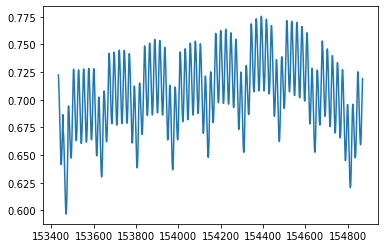

In [38]:
data_1.iloc[-window:,-1].plot()
# df_power_1[-1000:].y.plot()

<AxesSubplot:xlabel='ds'>

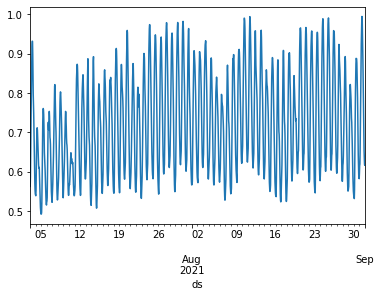

In [39]:
df_power_1[-window:].y.plot()

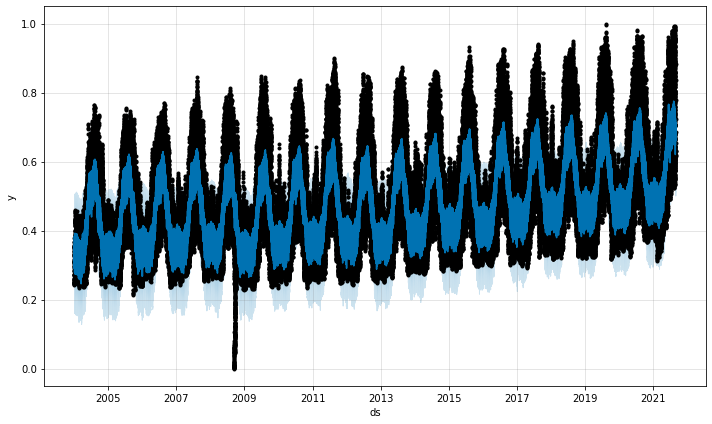

In [40]:
fig2 = m.plot(data_1)

<Figure size 6000x3600 with 0 Axes>

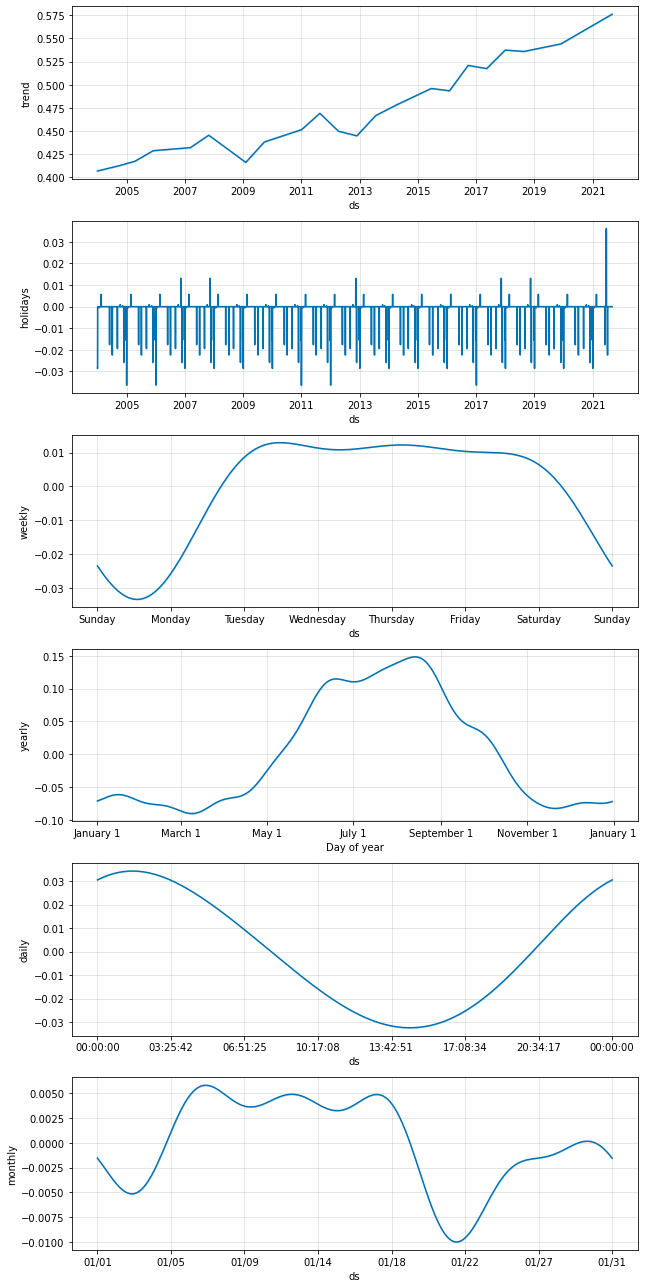

In [44]:
plt.figure(figsize=(20,12),dpi=300)
fig = m.plot_components(data_1)
# fig.add_subplot(3,2,1)



In [28]:
# fig.savefig("component.png",dpi=400)

In [29]:
fig.xticks()

AttributeError: 'Figure' object has no attribute 'xticks'